In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
eta_1_0 = np.load('../../data/param_evolution/eta_1_0.npy')
eta_2_0 = np.load('../../data/param_evolution/eta_2_0.npy')
sigma_0 = np.load('../../data/param_evolution/sigma_0.npy')
eta_1_1 = np.load('../../data/param_evolution/eta_1_1.npy')
eta_2_1 = np.load('../../data/param_evolution/eta_2_1.npy')
sigma_1 = np.load('../../data/param_evolution/sigma_1.npy')
eta_1_2 = np.load('../../data/param_evolution/eta_1_2.npy')
eta_2_2 = np.load('../../data/param_evolution/eta_2_2.npy')
sigma_2 = np.load('../../data/param_evolution/sigma_2.npy')

new_eta_1_0 = np.load('../../data/param_evolution/eta_1_vals-cnn.npy')
new_eta_2_0 = np.load('../../data/param_evolution/eta_2_vals-cnn.npy')
new_eta_1_1 = np.load('../../data/param_evolution/eta_1_vals-cnn-2.npy')   
new_eta_2_1 = np.load('../../data/param_evolution/eta_2_vals-cnn-2.npy')
new_eta_1_2 = np.load('../../data/param_evolution/eta_1_vals-cnn-3.npy')
new_eta_2_2 = np.load('../../data/param_evolution/eta_2_vals-cnn-3.npy')

os.environ["PATH"] += os.pathsep + "/usr/local/texlive/2024/bin/universal-darwin"
matplotlib.rcParams["text.usetex"] = True 

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

mean_eta_1 = (eta_1_0 + eta_1_1 + eta_1_2)/3
mean_eta_2 = (eta_2_0 + eta_2_1 + eta_2_2)/3
mean_sigma = (sigma_0 + sigma_1 + sigma_2)/3

std_eta_1 = np.std(np.array([eta_1_0, eta_1_1, eta_1_2]), axis=0)
std_eta_2 = np.std(np.array([eta_2_0, eta_2_1, eta_2_2]), axis=0)
std_sigma = np.std(np.array([sigma_0, sigma_1, sigma_2]), axis=0)

mean_new_eta_1 = (new_eta_1_0 + new_eta_1_1 + new_eta_1_2)/3
mean_new_eta_2 = (new_eta_2_0 + new_eta_2_1 + new_eta_2_2)/3
std_new_eta_1 = np.std(np.array([new_eta_1_0, new_eta_1_1, new_eta_1_2]), axis=0)
std_new_eta_2 = np.std(np.array([new_eta_2_0, new_eta_2_1, new_eta_2_2]), axis=0)

steps = np.linspace(1, 70, 6580)

print(mean_eta_1.shape)
print(std_eta_1.shape)
print(mean_sigma.shape)

(9400,)
(9400,)
(6580,)


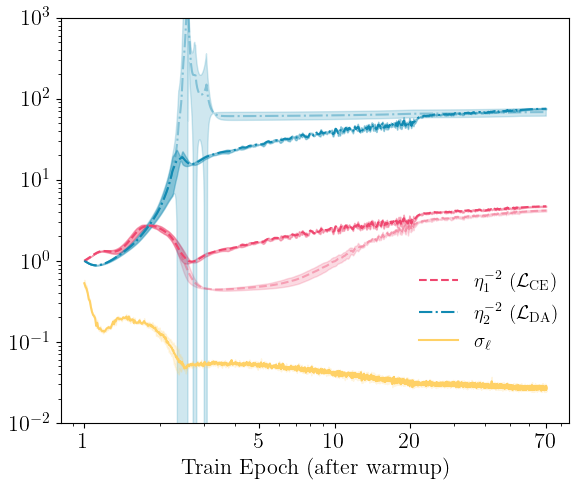

In [2]:
colors = ['#ef476f',  # red
          '#118ab2',  # yellow
          '#ffd166',  # Green
          ]  # Pink

line_styles = ['-', '--', '-.', (0, (3, 1, 1, 1))]  # Solid, dashed, dash-dot, dotted, custom

plt.figure(figsize=(6, 5))

std_eta_1_ = (2*std_eta_1) / mean_eta_1**3
std_eta_2_ = (2*std_eta_2) / mean_eta_2**3

std_new_eta_1_ = (2*std_new_eta_1) / mean_new_eta_1**3
std_new_eta_2_ = (2*std_new_eta_2) / mean_new_eta_2**3

plt.plot(steps, mean_eta_1[2820:]**-2, label=r'$\eta_1^{-2}$ ($\mathcal{L}_{\text{CE}}$)', color=colors[0], linestyle=line_styles[1], linewidth=1.5)
plt.plot(steps, mean_eta_2[2820:]**-2, label=r'$\eta_2^{-2}$ ($\mathcal{L}_{\text{DA}}$)', color=colors[1], linestyle=line_styles[2], linewidth=1.5)
plt.fill_between(steps, mean_eta_1[2820:]**-2 - std_eta_1_[2820:], mean_eta_1[2820:]**-2 + std_eta_1_[2820:], color=colors[0], alpha=0.4)
plt.fill_between(steps, mean_eta_2[2820:]**-2 - std_eta_2_[2820:], mean_eta_2[2820:]**-2 + std_eta_2_[2820:], color=colors[1], alpha=0.4)

plt.plot(steps, mean_new_eta_1[2820:]**-2, color=colors[0], alpha=0.4, linestyle=line_styles[1], lw = 1.5)
plt.plot(steps, mean_new_eta_2[2820:]**-2, alpha=0.4, color=colors[1], linestyle=line_styles[2],  lw = 1.5)
plt.fill_between(steps, mean_new_eta_1[2820:]**-2 - std_new_eta_1_[2820:], mean_new_eta_1[2820:]**-2 + std_new_eta_1_[2820:], alpha=0.2, color=colors[0])
plt.fill_between(steps, mean_new_eta_2[2820:]**-2 - std_new_eta_2_[2820:], mean_new_eta_2[2820:]**-2 + std_new_eta_2_[2820:], color=colors[1], alpha=0.2)

plt.plot(steps, mean_sigma, label=r'$\sigma_\ell$', color=colors[2], linestyle=line_styles[0])
plt.fill_between(steps, mean_sigma - std_sigma, mean_sigma + std_sigma, color=colors[2], alpha=0.2)

plt.legend(frameon=False, fontsize=14, loc='best', bbox_to_anchor=(0.67, 0.42))

plt.yscale('log')
plt.xscale('log')

# Set x-ticks explicitly to 30, 40, 60, and 100
xticks = [1, 5, 10, 20, 70]
plt.xticks(xticks, labels=[str(tick) for tick in xticks], fontsize=16)

plt.xlabel('Train Epoch (after warmup)', fontsize=16)
plt.ylim(1e-2, 1e3)
# plt.xlim(0, 71)
plt.yticks(fontsize=16)
plt.tight_layout()